# Find trajectory that can hit plane with given intial conditions -> 

### Example of plane found at pos. = (500,-500,700) , v. = (-10,50,0) , a. = (-5,4,4)

In [1]:
from math import sin,sqrt
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show,subplot
import numpy as np

import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib



from math import sqrt,pi,atan,tan,cos
from numpy import array,arange,matrix,transpose,squeeze
from numpy.linalg import inv,norm,det    # inv: matrix inverse, det: determinant
from pylab import plot,xlabel,ylabel,show,legend


In [2]:
def trajectory_missile(u_x,u_y,u_z,tf): # for plotting trajectory of missile fired

    def f(r,t):
        R = 0.08
        g = 9.8
        p = 1.22
        C = 0.47
        m = 1000

        resist = -0.5*(np.pi * (R**2) * p * C)/m

        a=r[3]
        b=r[4]
        c=r[5]

        fx=a
        fy=b
        fz=c

        v_tot = np.sqrt(a**2 + b**2 + c**2)


        fa= resist* a * v_tot
        fb= resist* b * v_tot
        fc= -g + resist* c * v_tot


        return array([fx,fy,fz,fa,fb,fc],float)



    a = 0.0
    b = tf
    N = 10000
    h = (b-a)/N

    tpoints = arange(a,b+h,h)
    xpoints = []
    ypoints = []
    zpoints = []
    apoints = []
    bpoints = []
    cpoints = []
    
    # Deploying the range kutta method

    r = array([0,0,0,u_x,u_y,u_z],float)

    for t in tpoints:

        if r[2] < 0 : # height cant be negative 
            break
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])


        apoints.append(r[3])
        bpoints.append(r[4])
        cpoints.append(r[5])

        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6

    return xpoints,ypoints,zpoints

In [3]:
# Function for inputting plane info. and trajectory

def plane_traj(x,y,z,u_x,u_y,u_z,a_x,a_y,a_z,t): # for getting trajectory and current info
    global t_trajx
    global t_trajy
    global t_trajz
    t_trajx = []
    t_trajy = []
    t_trajz = []
    
    for t in range(t+1):
        # using motions of equations
        s_x = x + u_x * t + 0.5 * a_x * t**2
        s_y = y + u_y * t + 0.5 * a_y * t**2
        s_z = z + u_z * t + 0.5 * a_z * t**2
        t_trajx.append(s_x)
        t_trajy.append(s_y)
        t_trajz.append(s_z)
    return(s_x,s_y,s_z)



def plane_traj_v2(x,y,z,u_x,u_y,u_z,a_x,a_y,a_z,t): # for getting trajectory and current info
    ti = 0
    tf = t

    N = 10000
    h = (tf-ti)/N

    tpoints = arange(ti,tf+h,h)
    
    t_trajx = []
    t_trajy = []
    t_trajz = []
    
    for t in tpoints:
        # using motions of equations
        s_x = x + u_x * t + 0.5 * a_x * t**2
        s_y = y + u_y * t + 0.5 * a_y * t**2
        s_z = z + u_z * t + 0.5 * a_z * t**2
        t_trajx.append(s_x)
        t_trajy.append(s_y)
        t_trajz.append(s_z)
    return(t_trajx,t_trajy,t_trajz)

def plane_pos(x,y,z,u_x,u_y,u_z,a_x,a_y,a_z,t): # only for getting point at time t

    # using motions of equations
    s_x = x + u_x * t + 0.5 * a_x * t**2
    s_y = y + u_y * t + 0.5 * a_y * t**2
    s_z = z + u_z * t + 0.5 * a_z * t**2

    return(s_x,s_y,s_z)

In [4]:
def optimal_traj(ti,tf,t_x,t_y,t_z,t_vx,t_vy,t_vz,t_ax,t_ay,t_az): # for determining optimal traj

    Cdrag = 0.47 # coefficient of drag

    # Parameters in SI units
    g = 9.8         # Acceleration due to gravity
    m = 1.          # Mass of the projectile
    R = 0.08        # Radius of the spherical projectile
    rho = 1.22      # Air density
    xi = 0.         # Initial horizontal position
    yi = 0.         # Initial vertical position
    zi = 0


    # Final position of target after t seconds
    xf , yf , zf = plane_traj(t_x,t_y,t_z,t_vx,t_vy,t_vz,t_ax,t_ay,t_az,tf-ti)

    def f(r,t):
        R = 0.08
        g = 9.8
        p = 1.22
        C = 0.47
        m = 1000

        resist = -0.5*(np.pi * (R**2) * p * C)/m


        a=r[1]
        b=r[3]
        c=r[5]

        fx=a
        fy=b
        fz=c

        v_tot = np.sqrt(a**2 + b**2 + c**2)


        fa= resist* a * v_tot
        fb= resist* b * v_tot
        fc= -g + resist* c * v_tot


        return array([fx,fa,fy,fb,fz,fc],float)
    # Function that takes initial velocity [vix,viy] as input and returns
    # discrepancies from the final condition
    # The input and output are both 1D arrays of length 2


    # This is the function of which the root(s) we will find by Newton's method
    def Fnewton(vi):
        N = 1000 						   # Number of steps in shooting
        dt = (tf-ti)/N 					# Timestep size in shooting
        r = array([xi,vi[0],yi,vi[1],zi,vi[2]],float) 		# Set the ICs of the IVP
        tpoints = arange(ti,tf,dt)    
        # Start shooting by fourth-order RK
        for t in tpoints:
            k1 = dt*f(r,t)
            k2 = dt*f(r+0.5*k1,t+0.5*dt)
            k3 = dt*f(r+0.5*k2,t+0.5*dt)
            k4 = dt*f(r+k3,t+dt)
            r += (k1+2*k2+2*k3+k4)/6
        return array([r[0]-xf,r[2]-yf,r[4]-zf],float)


    maxIT = 50 				    # Maximum number of Newton's iteration allowed    
    accuracy = 1.e-6 			 # Desired accuracy on the initial speed or the final position
    ds = 1.e-9                # Step size used in numerical evaluation of derivatives
    deltax = array([ds/2,0.,0.])
    deltay = array([0.,ds/2,0.])
    deltaz = array([0.,0.,ds/2])
    vi = array([100., 100.,100.]) 		# Initial guess
    delta = 1.0 				     # Error estimation of Newton's method, initialized to any number > accuracy
    count = 0 				        # Counter for number of iterations
    while delta>accuracy:

        if count>maxIT:
            exit("Newton's method fails. Bad initial guess, or no solution for the given BC.")
            # No root found after maxIT times of Newton's iterations

        Fvi =  Fnewton(vi)   

        # Partial derivatives
        dFxdx = (Fnewton(vi+deltax)[0]-Fnewton(vi-deltax)[0])/ds
        dFxdy = (Fnewton(vi+deltay)[0]-Fnewton(vi-deltay)[0])/ds
        dFxdz = (Fnewton(vi+deltaz)[0]-Fnewton(vi-deltaz)[0])/ds

        dFydx = (Fnewton(vi+deltax)[1]-Fnewton(vi-deltax)[1])/ds
        dFydy = (Fnewton(vi+deltay)[1]-Fnewton(vi-deltay)[1])/ds
        dFydz = (Fnewton(vi+deltaz)[1]-Fnewton(vi-deltaz)[1])/ds

        dFzdx = (Fnewton(vi+deltax)[2]-Fnewton(vi-deltax)[2])/ds
        dFzdy = (Fnewton(vi+deltay)[2]-Fnewton(vi-deltay)[2])/ds
        dFzdz = (Fnewton(vi+deltaz)[2]-Fnewton(vi-deltaz)[2])/ds

        # Define the derivative matrix
        # Defined as matrix instead of array
        # because matrix multiplication will be performed
        Fprime = matrix([[dFxdx,dFxdy,dFxdz],[dFydx,dFydy,dFydz],[dFzdx,dFzdy,dFzdz]])

        # Check if the derivative is singular
        if det(Fprime)==0:
            exit("Bad initial guess, Newton's method fails.")

        # Change Fvi from row array to column vector to do matrix multiplication
        Fvi = transpose(matrix(Fvi))

        # Matrix multiplcation, returning a column vector deltav
        deltav = inv(Fprime)*Fvi  

        Fvi = squeeze(array(transpose(Fvi))) 		      # Change Fvi from column vector back to row array
        deltav = squeeze(array(transpose(deltav))) 	# Change deltav from column vector to row array

        # Defining error estimation. norm treats a 1D arrary as a vector and returns its magnitude
        #delta = norm(deltav)  # Normal definition of error in Newton's method
        delta = norm(Fvi)  # Use this definition if you care more on hitting the target accurately than finding accurate initial velocity

        vi -= deltav # Newton's iteration formula

        count +=1

    return(vi[0],vi[1],vi[2])


position of plane at: 1 sec
487.5 -448.0 702.0
position of missile 1 sec
487.50000000000165 -448.00000000000256 701.9999999999997 1 sec
total speed of missile 971.2344800716314


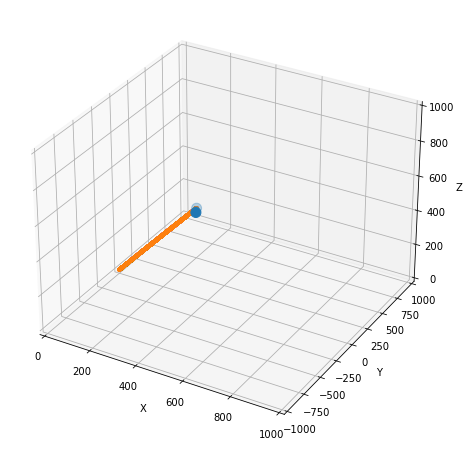

In [5]:
# Executing all functions to get Q1 answer

# To hit the plane in one second
ti = 0
tf = 1

opt_vx,opt_vy,opt_vz = optimal_traj(ti,tf,500,-500,700,-10,50,0,-5,4,4)

# to find the value of plane position at tf

print('position of plane at:',tf,'sec')

t_x,t_y,t_z = plane_pos(500,-500,700,-10,50,0,-5,4,4,tf)
print(t_x,t_y,t_z)

# Compare with value of trajectory position at 1 second

xpoints,ypoints,zpoints = trajectory_missile(opt_vx,opt_vy,opt_vz,tf)
print('position of missile',tf,'sec')
print(xpoints[-1],ypoints[-1],zpoints[-1],tf,'sec')

v_total = np.sqrt(opt_vx**2 + opt_vy**2 + opt_vz**2)

print('total speed of missile',v_total)


fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = zpoints
xdata = xpoints
ydata = ypoints

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,1000)
ax.set_ylim(-1000,1000)
ax.set_zlim(0,1000)

ax.scatter3D([500,t_x], [-500,t_y], [700,t_z] ,s= 100 , cmap='Greens');
ax.scatter3D(xdata, ydata, zdata, s = 10 , cmap='Greens');
#ax.plot3D(xdata, ydata, zdata, 'gray')


# Find the optimal trajectory if the there is a ceiling set on the max speed of a missile

### Take example maximum allowed speed of missile fired as 200 m/s

In [6]:
def optimal_traj_200(t_x,t_y,t_z,t_vx,t_vy,t_vz,t_ax,t_ay,t_az):
    vi = array([200., 200.,200.]) 		# Initial guess
    ti = 0
    tf = 0
    total_v =  np.sqrt(vi[0]**2 + vi[1]**2 + vi[2]**2)
    
    while total_v > 200:
        tf = tf + 1

        Cdrag = 0.47 # coefficient of drag

        # Parameters in SI units

        R = 0.08        # Radius of the spherical projectile
        rho = 1.22      # Air density
        xi = 0.         # Initial horizontal position
        yi = 0.         # Initial vertical position
        zi = 0


        # Final position of target after t seconds
        xf , yf , zf = plane_traj(t_x,t_y,t_z,t_vx,t_vy,t_vz,t_ax,t_ay,t_az,tf-ti)
 
        
        def f(r,t):
            R = 0.08
            g = 9.8
            p = 1.22
            C = 0.47
            m = 1000

            resist = -0.5*(np.pi * (R**2) * p * C)/m


            a=r[1]
            b=r[3]
            c=r[5]

            fx=a
            fy=b
            fz=c

            v_tot = np.sqrt(a**2 + b**2 + c**2)


            fa= resist* a * v_tot
            fb= resist* b * v_tot
            fc= -g + resist* c * v_tot


            return array([fx,fa,fy,fb,fz,fc],float)
        # Function that takes initial velocity [vix,viy] as input and returns
        # discrepancies from the final condition
        # The input and output are both 1D arrays of length 2


        # This is the function of which the root(s) we will find by Newton's method
        def Fnewton(vi):
            N = 1000 						   # Number of steps in shooting
            dt = (tf-ti)/N 					# Timestep size in shooting
            r = array([xi,vi[0],yi,vi[1],zi,vi[2]],float) 		# Set the ICs of the IVP
            tpoints = arange(ti,tf,dt)    
            # Start shooting by fourth-order RK
            for t in tpoints:
                k1 = dt*f(r,t)
                k2 = dt*f(r+0.5*k1,t+0.5*dt)
                k3 = dt*f(r+0.5*k2,t+0.5*dt)
                k4 = dt*f(r+k3,t+dt)
                r += (k1+2*k2+2*k3+k4)/6
            return array([r[0]-xf,r[2]-yf,r[4]-zf],float)


        maxIT = 50 				    # Maximum number of Newton's iteration allowed    
        accuracy = 1.e-6 			 # Desired accuracy on the initial speed or the final position
        ds = 1.e-9                # Step size used in numerical evaluation of derivatives
        deltax = array([ds/2,0.,0.])
        deltay = array([0.,ds/2,0.])
        deltaz = array([0.,0.,ds/2])
        delta = 1.0 				     # Error estimation of Newton's method, initialized to any number > accuracy
        count = 0 				        # Counter for number of iterations
        while delta>accuracy:

            if count>maxIT:
                exit("Newton's method fails. Bad initial guess, or no solution for the given BC.")
                # No root found after maxIT times of Newton's iterations

            Fvi =  Fnewton(vi)   

            # Partial derivatives
            dFxdx = (Fnewton(vi+deltax)[0]-Fnewton(vi-deltax)[0])/ds
            dFxdy = (Fnewton(vi+deltay)[0]-Fnewton(vi-deltay)[0])/ds
            dFxdz = (Fnewton(vi+deltaz)[0]-Fnewton(vi-deltaz)[0])/ds

            dFydx = (Fnewton(vi+deltax)[1]-Fnewton(vi-deltax)[1])/ds
            dFydy = (Fnewton(vi+deltay)[1]-Fnewton(vi-deltay)[1])/ds
            dFydz = (Fnewton(vi+deltaz)[1]-Fnewton(vi-deltaz)[1])/ds

            dFzdx = (Fnewton(vi+deltax)[2]-Fnewton(vi-deltax)[2])/ds
            dFzdy = (Fnewton(vi+deltay)[2]-Fnewton(vi-deltay)[2])/ds
            dFzdz = (Fnewton(vi+deltaz)[2]-Fnewton(vi-deltaz)[2])/ds

            # Define the derivative matrix
            # Defined as matrix instead of array
            # because matrix multiplication will be performed
            Fprime = matrix([[dFxdx,dFxdy,dFxdz],[dFydx,dFydy,dFydz],[dFzdx,dFzdy,dFzdz]])

            # Check if the derivative is singular
            if det(Fprime)==0:
                exit("Bad initial guess, Newton's method fails.")

            # Change Fvi from row array to column vector to do matrix multiplication
            Fvi = transpose(matrix(Fvi))

            # Matrix multiplcation, returning a column vector deltav
            deltav = inv(Fprime)*Fvi  

            Fvi = squeeze(array(transpose(Fvi))) 		      # Change Fvi from column vector back to row array
            deltav = squeeze(array(transpose(deltav))) 	# Change deltav from column vector to row array

            # Defining error estimation. norm treats a 1D arrary as a vector and returns its magnitude
            #delta = norm(deltav)  # Normal definition of error in Newton's method
            delta = norm(Fvi)  # Use this definition if you care more on hitting the target accurately than finding accurate initial velocity

            vi -= deltav # Newton's iteration formula

            count +=1
        total_v =  np.sqrt(vi[0]**2 + vi[1]**2 + vi[2]**2)
        
    
    return(vi[0],vi[1],vi[2],tf)

Total speed is 195.5530499915685 m/s
position of plane at: 5 sec
387.5 -200.0 750.0
position of missile 5 sec
387.49999999999955 -199.9999999999987 750.0000000000056 5 sec


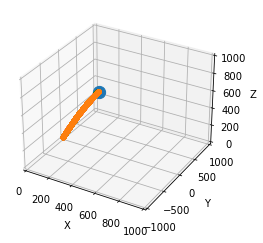

In [7]:
opt_vx,opt_vy,opt_vz, tf = optimal_traj_200(500,-500,700,-10,50,0,-5,4,4)

t_v = np.sqrt(opt_vx**2+opt_vy**2+opt_vz**2)
print('Total speed is',t_v,'m/s')

# to find the value of plane position at tf

print('position of plane at:',tf,'sec')

t_x,t_y,t_z = plane_pos(500,-500,700,-10,50,0,-5,4,4,tf)
print(t_x,t_y,t_z)

# Compare with value of trajectory position at 1 second

xpoints,ypoints,zpoints = trajectory_missile(opt_vx,opt_vy,opt_vz,tf)
print('position of missile',tf,'sec')
print(xpoints[-1],ypoints[-1],zpoints[-1],tf,'sec')


fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = zpoints
xdata = xpoints
ydata = ypoints

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0,1000)
ax.set_ylim(-1000,1000)
ax.set_zlim(0,1000)

ax.scatter3D(t_x, t_y, t_z,s= 150 , cmap='Greens');
ax.scatter3D(xdata, ydata, zdata, cmap='Greens');
#ax.plot3D(xdata, ydata, zdata, 'gray')


# Find the optimal trajectory with a maximum speed limit and an extra thrust added to the missile which is in the net direction of the missile speed vector


### Exampe of the maximum allowed speed is 100 m/s and a thrust of 25,000 N is applied to the missile in the direction of velocity

In [8]:
def trajectory_thrust_missile(u_x,u_y,u_z,tf): # trajectory of thrusted missile
     
    total_thrust = 25000
    def f(r,t):
        
        R = 0.08
        g = 9.8
        p = 1.22
        C = 0.47
        m = 1000
        resist = -0.5*(np.pi * (R**2) * p * C)/m

        a=r[3]
        b=r[4]
        c=r[5]
        
        v_t = np.sqrt(r[3]**2 + r[4]**2 + r[5]**2)

        
        thrust_x = total_thrust/v_t * r[3]
        thrust_y = total_thrust/v_t * r[4]
        thrust_z = total_thrust/v_t * r[5]
  


        fx=a
        fy=b
        fz=c

        v_tot = np.sqrt(a**2 + b**2 + c**2)
                

        fa= resist* a * v_tot + thrust_x/m 
        fb= resist* b * v_tot + thrust_y/m 
        fc= -g + resist* c * v_tot + thrust_z/m 
        


        return array([fx,fy,fz,fa,fb,fc],float)


    a = 0.0
    b = tf
    N = 10000
    h = (b-a)/N

    tpoints = arange(a,b+h,h)
    xpoints = []
    ypoints = []
    zpoints = []
    apoints = []
    bpoints = []
    cpoints = []



    r = array([0,0,0,u_x,u_y,u_z],float)



    for t in tpoints:
        
        if r[2] < 0 : # height cant be negative 
            print(r)
            break
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])

        apoints.append(r[3])
        bpoints.append(r[4])
        cpoints.append(r[5])

        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6

        


    return xpoints,ypoints,zpoints

In [9]:
def optimal_traj_100_thrust(t_x,t_y,t_z,t_vx,t_vy,t_vz,t_ax,t_ay,t_az):
    vi = array([100., 100.,100.]) 		# Initial guess
    ti = 0
    tf = 0
    total_v =  np.sqrt(vi[0]**2 + vi[1]**2 + vi[2]**2)
    total_thrust = 25000
    
    while total_v > 100:
        tf = tf + 4

        Cdrag = 0.47 # coefficient of drag

        # Parameters in SI units

        R = 0.08        # Radius of the spherical projectile
        rho = 1.22      # Air density
        xi = 0.         # Initial horizontal position
        yi = 0.         # Initial vertical position
        zi = 0


        # Final position of target after t seconds
        xf , yf , zf = plane_traj(t_x,t_y,t_z,t_vx,t_vy,t_vz,t_ax,t_ay,t_az,tf-ti)
 
        
        def f(r,t):
            R = 0.08
            g = 9.8
            p = 1.22
            C = 0.47
            m = 1000
            
            v_t = np.sqrt(r[1]**2 + r[3]**2 + r[5]**2)
            
            thrust_x = total_thrust/v_t * r[1]
            thrust_y = total_thrust/v_t * r[3]
            thrust_z = total_thrust/v_t * r[5]

            resist = -0.5*(np.pi * (R**2) * p * C)/m


            a=r[1]
            b=r[3]
            c=r[5]

            fx=a
            fy=b
            fz=c

            v_tot = np.sqrt(a**2 + b**2 + c**2)


            fa= thrust_x/m + resist* a * v_tot
            fb= thrust_y/m + resist* b * v_tot
            fc= -g + resist* c * v_tot + thrust_z/m


            return array([fx,fa,fy,fb,fz,fc],float)
        # Function that takes initial velocity [vix,viy] as input and returns
        # discrepancies from the final condition
        # The input and output are both 1D arrays of length 2


        # This is the function of which the root(s) we will find by Newton's method
        def Fnewton(vi):
            N = 1000 						   # Number of steps in shooting
            dt = (tf-ti)/N 					# Timestep size in shooting
            r = array([xi,vi[0],yi,vi[1],zi,vi[2]],float) 		# Set the ICs of the IVP
            tpoints = arange(ti,tf,dt)    
            # Start shooting by fourth-order RK
            for t in tpoints:
                k1 = dt*f(r,t)
                k2 = dt*f(r+0.5*k1,t+0.5*dt)
                k3 = dt*f(r+0.5*k2,t+0.5*dt)
                k4 = dt*f(r+k3,t+dt)
                r += (k1+2*k2+2*k3+k4)/6
            return array([r[0]-xf,r[2]-yf,r[4]-zf],float)


        maxIT = 50 				    # Maximum number of Newton's iteration allowed    
        accuracy = 1.e-1 			 # Desired accuracy on the initial speed or the final position
        ds = 1.e-9                # Step size used in numerical evaluation of derivatives
        deltax = array([ds/2,0.,0.])
        deltay = array([0.,ds/2,0.])
        deltaz = array([0.,0.,ds/2])
        delta = 1.0 				     # Error estimation of Newton's method, initialized to any number > accuracy
        count = 0 				        # Counter for number of iterations
        while delta>accuracy:

            if count>maxIT:
                exit("Newton's method fails. Bad initial guess, or no solution for the given BC.")
                # No root found after maxIT times of Newton's iterations

            Fvi =  Fnewton(vi)   

            # Partial derivatives
            dFxdx = (Fnewton(vi+deltax)[0]-Fnewton(vi-deltax)[0])/ds
            dFxdy = (Fnewton(vi+deltay)[0]-Fnewton(vi-deltay)[0])/ds
            dFxdz = (Fnewton(vi+deltaz)[0]-Fnewton(vi-deltaz)[0])/ds

            dFydx = (Fnewton(vi+deltax)[1]-Fnewton(vi-deltax)[1])/ds
            dFydy = (Fnewton(vi+deltay)[1]-Fnewton(vi-deltay)[1])/ds
            dFydz = (Fnewton(vi+deltaz)[1]-Fnewton(vi-deltaz)[1])/ds

            dFzdx = (Fnewton(vi+deltax)[2]-Fnewton(vi-deltax)[2])/ds
            dFzdy = (Fnewton(vi+deltay)[2]-Fnewton(vi-deltay)[2])/ds
            dFzdz = (Fnewton(vi+deltaz)[2]-Fnewton(vi-deltaz)[2])/ds

            # Define the derivative matrix
            # Defined as matrix instead of array
            # because matrix multiplication will be performed
            Fprime = matrix([[dFxdx,dFxdy,dFxdz],[dFydx,dFydy,dFydz],[dFzdx,dFzdy,dFzdz]])

            # Check if the derivative is singular
            if det(Fprime)==0:
                exit("Bad initial guess, Newton's method fails.")

            # Change Fvi from row array to column vector to do matrix multiplication
            Fvi = transpose(matrix(Fvi))

            # Matrix multiplcation, returning a column vector deltav
            deltav = inv(Fprime)*Fvi  

            Fvi = squeeze(array(transpose(Fvi))) 		      # Change Fvi from column vector back to row array
            deltav = squeeze(array(transpose(deltav))) 	# Change deltav from column vector to row array

            # Defining error estimation. norm treats a 1D arrary as a vector and returns its magnitude
            #delta = norm(deltav)  # Normal definition of error in Newton's method
            delta = norm(Fvi)  # Use this definition if you care more on hitting the target accurately than finding accurate initial velocity

            vi -= deltav # Newton's iteration formula

            count +=1
            #print(vi)
        total_v =  np.sqrt(vi[0]**2 + vi[1]**2 + vi[2]**2)
        #print(total_v,tf,vi)
        
    
    return(vi[0],vi[1],vi[2],tf)


In [10]:
optimal_traj_100_thrust(5000,-5000,7000,-50,50,0,4,4,4)

(17.801502640012732, -4.417700361457601, 82.53753640152009, 32)

In [11]:
print(plane_pos(5000,-5000,7000,-50,50,0,4,4,4,0.1))
print(plane_pos(5000,-5000,7000,-50,50,0,4,4,4,0.2))



(4995.02, -4994.98, 7000.02)
(4990.08, -4989.92, 7000.08)


In [12]:
xpoints,ypoints,zpoints= trajectory_thrust_missile(17.80150263987736, -4.417700361433812, 82.53753640109461, 32)

ypoints[-1]

-1352.0000000270286

# Designing pipeline that can independently sense paramters of a moving plane by just taking in 3 positions 




In [13]:
def auto_para_detect(s1_x,s1_y,s1_z,s2_x,s2_y,s2_z,s3_x,s3_y,s3_z,t_d):
    # using modified equations of motion
    
    a_x = ( (s3_x - s1_x) - 2*(s2_x - s1_x) ) / (t_d**2)
    a_y = ( (s3_y - s1_y) - 2*(s2_y - s1_y) ) / (t_d**2)
    a_z = ( (s3_z - s1_z) - 2*(s2_z - s1_z) ) / (t_d**2)
    
    u_x = (s2_x - s1_x)/(t_d) - a_x*t_d/2
    u_y = (s2_y - s1_y)/(t_d) - a_y*t_d/2
    u_z = (s2_z - s1_z)/(t_d) - a_z*t_d/2

    

    # return conditions at t=0 -> first detected
    return(s1_x,s1_y,s1_z,u_x,u_y,u_z,a_x,a_y,a_z)
    #return(si_x,si_y,si_z,u_x,u_y,u_z,a_x,a_y,a_z)
    

In [14]:
auto_para_detect(5000,-5000,7000,4995.02, -4994.98, 7000.02,4990.08, -4989.92, 7000.08 ,0.1)

(5000,
 -5000,
 7000,
 -49.999999999990905,
 50.000000000009095,
 9.094974773304898e-12,
 3.9999999999054117,
 3.9999999999054117,
 3.9999999999054117)

# Animation

In [22]:
%matplotlib notebook

The system is now detecting the planes position every 0.1 second , starting for t=0

Plane first seen at t=0 at [5000, -5000, 7000]
Plane then seen at t=0.1 at [4995.02, -4994.98, 7000.02]
Plane then seen at t=0.2 at [4990.08, -4989.92, 7000.08]

Using the 3 detected positions stated above The planes paramters of motions are
At the intial t = 0 With pos. x: 5000 y: -5000 z: 7000
The intial speed was x: -49.999999999990905 y: 50.000000000009095 z: 9.094974773304898e-12
The acceleration is x: 3.9999999999054117 y: 3.9999999999054117 z: 3.9999999999054117

For the missile to strike the plane at: 32 sec
It must be fired at Speed in X-direc. : 17.801502639133254 Speed in Y-direc. : -4.4177003614652826 Speed in Z-direc. : 82.53753639900316
position of plane at: 32 sec
5447.999999951862 -1352.0000000481382 9047.999999951862

position of missile at 32 sec
5448.000000064015 -1352.0000000807424 9047.999999895728 32 sec


<IPython.core.display.Javascript object>


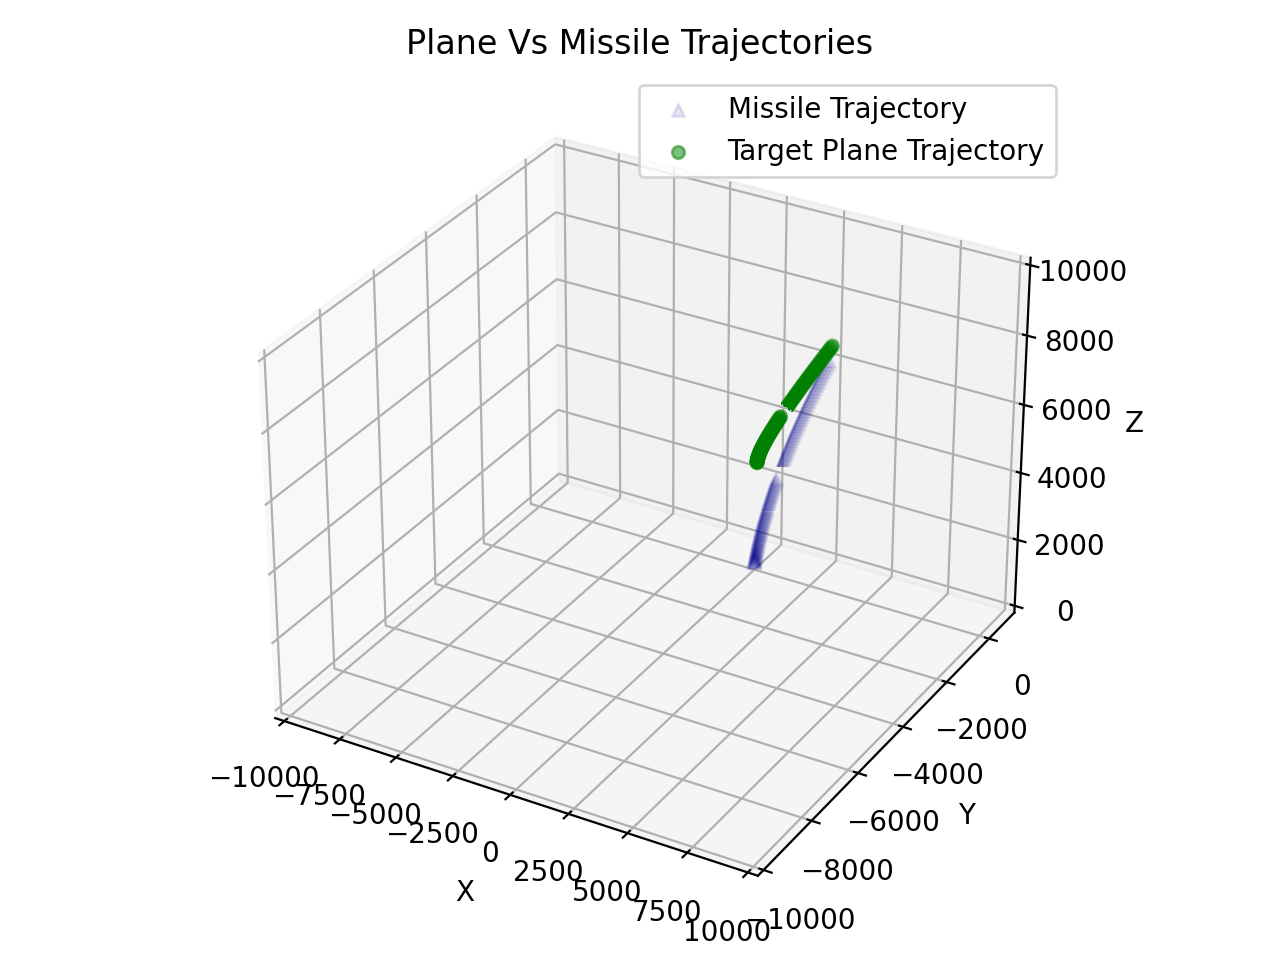

In [23]:
from math import sin,sqrt
from numpy import array,arange
from pylab import plot,xlabel,ylabel,show,subplot
import numpy as np

import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib



from math import sqrt,pi,atan,tan,cos
from numpy import array,arange,matrix,transpose,squeeze
from numpy.linalg import inv,norm,det    # inv: matrix inverse, det: determinant
from pylab import plot,xlabel,ylabel,show,legend



# Functions for inputting plane info. and trajectory


def plane_traj_v2(x,y,z,u_x,u_y,u_z,a_x,a_y,a_z,t): # for getting trajectory and current info
    ti = 0
    tf = t

    N = 10000
    h = (tf-ti)/N

    tpoints = arange(ti,tf+h,h)
    
    t_trajx = []
    t_trajy = []
    t_trajz = []
    
    for t in tpoints:
        # using motions of equations
        s_x = x + u_x * t + 0.5 * a_x * t**2
        s_y = y + u_y * t + 0.5 * a_y * t**2
        s_z = z + u_z * t + 0.5 * a_z * t**2
        t_trajx.append(s_x)
        t_trajy.append(s_y)
        t_trajz.append(s_z)
    return(t_trajx,t_trajy,t_trajz)

def plane_pos(x,y,z,u_x,u_y,u_z,a_x,a_y,a_z,t): # only for getting point at time t

    # using motions of equations
    s_x = x + u_x * t + 0.5 * a_x * t**2
    s_y = y + u_y * t + 0.5 * a_y * t**2
    s_z = z + u_z * t + 0.5 * a_z * t**2

    return(s_x,s_y,s_z)

# finding trajectory of missile with thrust of 25000 N

def trajectory_thrust_missile(u_x,u_y,u_z,tf): # trajectory of thrusted missile
     
    # setting intial condition
    
    total_thrust = 25000
    def f(r,t): # function for kutta-runge method
        
        R = 0.08
        g = 9.8
        p = 1.22
        C = 0.47
        m = 1000
        resist = -0.5*(np.pi * (R**2) * p * C)/m

        a=r[3]
        b=r[4]
        c=r[5]
        
        v_t = np.sqrt(r[3]**2 + r[4]**2 + r[5]**2)

        
        thrust_x = total_thrust/v_t * r[3]
        thrust_y = total_thrust/v_t * r[4]
        thrust_z = total_thrust/v_t * r[5]
  


        fx=a
        fy=b
        fz=c

        v_tot = np.sqrt(a**2 + b**2 + c**2)
                

        fa= resist* a * v_tot + thrust_x/m 
        fb= resist* b * v_tot + thrust_y/m 
        fc= -g + resist* c * v_tot + thrust_z/m 
        


        return array([fx,fy,fz,fa,fb,fc],float)
    # setting intial conditions

    a = 0.0
    b = tf
    N = 10000
    h = (b-a)/N

    tpoints = arange(a,b+h,h)
    xpoints = []
    ypoints = []
    zpoints = []
    apoints = []
    bpoints = []
    cpoints = []



    r = array([0,0,0,u_x,u_y,u_z],float)



    for t in tpoints:
        
        if r[2] < 0 : # height cant be negative 
            print(r)
            break
        xpoints.append(r[0])
        ypoints.append(r[1])
        zpoints.append(r[2])

        apoints.append(r[3])
        bpoints.append(r[4])
        cpoints.append(r[5])

        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6

        


    return xpoints,ypoints,zpoints

# finding optimal trajectory for detected plane with 100 m/s intial speed limit


def optimal_traj_100_thrust(t_x,t_y,t_z,t_vx,t_vy,t_vz,t_ax,t_ay,t_az):
    vi = array([100., 100.,100.]) 		# Initial guess
    ti = 0
    tf = 0
    total_v =  np.sqrt(vi[0]**2 + vi[1]**2 + vi[2]**2)
    total_thrust = 25000
    
    while total_v > 100:
        tf = tf + 4

        Cdrag = 0.47 # coefficient of drag

        # Parameters in SI units

        R = 0.08        # Radius of the spherical projectile
        rho = 1.22      # Air density
        xi = 0.         # Initial horizontal position
        yi = 0.         # Initial vertical position
        zi = 0


        # Final position of target after t seconds
        xf , yf , zf = plane_pos(t_x,t_y,t_z,t_vx,t_vy,t_vz,t_ax,t_ay,t_az,tf-ti)
 
        
        def f(r,t):
            R = 0.08
            g = 9.8
            p = 1.22
            C = 0.47
            m = 1000
            
            v_t = np.sqrt(r[1]**2 + r[3]**2 + r[5]**2)
            
            thrust_x = total_thrust/v_t * r[1]
            thrust_y = total_thrust/v_t * r[3]
            thrust_z = total_thrust/v_t * r[5]

            resist = -0.5*(np.pi * (R**2) * p * C)/m


            a=r[1]
            b=r[3]
            c=r[5]

            fx=a
            fy=b
            fz=c

            v_tot = np.sqrt(a**2 + b**2 + c**2)


            fa= thrust_x/m + resist* a * v_tot
            fb= thrust_y/m + resist* b * v_tot
            fc= -g + resist* c * v_tot + thrust_z/m


            return array([fx,fa,fy,fb,fz,fc],float)
        # Function that takes initial velocity [vix,viy] as input and returns
        # discrepancies from the final condition
        # The input and output are both 1D arrays of length 2


        # This is the function of which the root(s) we will find by Newton's method
        def Fnewton(vi):
            N = 1000 						   # Number of steps in shooting
            dt = (tf-ti)/N 					# Timestep size in shooting
            r = array([xi,vi[0],yi,vi[1],zi,vi[2]],float) 		# Set the ICs of the IVP
            tpoints = arange(ti,tf,dt)    
            # Start shooting by fourth-order RK
            for t in tpoints:
                k1 = dt*f(r,t)
                k2 = dt*f(r+0.5*k1,t+0.5*dt)
                k3 = dt*f(r+0.5*k2,t+0.5*dt)
                k4 = dt*f(r+k3,t+dt)
                r += (k1+2*k2+2*k3+k4)/6
            return array([r[0]-xf,r[2]-yf,r[4]-zf],float)


        maxIT = 50 				    # Maximum number of Newton's iteration allowed    
        accuracy = 1.e-1 			 # Desired accuracy on the initial speed or the final position
        ds = 1.e-9                # Step size used in numerical evaluation of derivatives
        deltax = array([ds/2,0.,0.])
        deltay = array([0.,ds/2,0.])
        deltaz = array([0.,0.,ds/2])
        delta = 1 				     # Error estimation of Newton's method, initialized to any number > accuracy
        count = 0 				        # Counter for number of iterations
        while delta>accuracy:

            if count>maxIT:
                exit("Newton's method fails. Bad initial guess, or no solution for the given BC.")
                # No root found after maxIT times of Newton's iterations

            Fvi =  Fnewton(vi)   

            # Partial derivatives
            dFxdx = (Fnewton(vi+deltax)[0]-Fnewton(vi-deltax)[0])/ds
            dFxdy = (Fnewton(vi+deltay)[0]-Fnewton(vi-deltay)[0])/ds
            dFxdz = (Fnewton(vi+deltaz)[0]-Fnewton(vi-deltaz)[0])/ds

            dFydx = (Fnewton(vi+deltax)[1]-Fnewton(vi-deltax)[1])/ds
            dFydy = (Fnewton(vi+deltay)[1]-Fnewton(vi-deltay)[1])/ds
            dFydz = (Fnewton(vi+deltaz)[1]-Fnewton(vi-deltaz)[1])/ds

            dFzdx = (Fnewton(vi+deltax)[2]-Fnewton(vi-deltax)[2])/ds
            dFzdy = (Fnewton(vi+deltay)[2]-Fnewton(vi-deltay)[2])/ds
            dFzdz = (Fnewton(vi+deltaz)[2]-Fnewton(vi-deltaz)[2])/ds

            # Define the derivative matrix
            # Defined as matrix instead of array
            # because matrix multiplication will be performed
            Fprime = matrix([[dFxdx,dFxdy,dFxdz],[dFydx,dFydy,dFydz],[dFzdx,dFzdy,dFzdz]])

            # Check if the derivative is singular
            if det(Fprime)==0:
                exit("Bad initial guess, Newton's method fails.")

            # Change Fvi from row array to column vector to do matrix multiplication
            Fvi = transpose(matrix(Fvi))

            # Matrix multiplcation, returning a column vector deltav
            deltav = inv(Fprime)*Fvi  

            Fvi = squeeze(array(transpose(Fvi))) 		      # Change Fvi from column vector back to row array
            deltav = squeeze(array(transpose(deltav))) 	# Change deltav from column vector to row array

            # Defining error estimation. norm treats a 1D arrary as a vector and returns its magnitude
            #delta = norm(deltav)  # Normal definition of error in Newton's method
            delta = norm(Fvi)  # Use this definition if you care more on hitting the target accurately than finding accurate initial velocity

            vi -= deltav # Newton's iteration formula

            count +=1
            #print(vi)
        total_v =  np.sqrt(vi[0]**2 + vi[1]**2 + vi[2]**2)
        #print(total_v,tf,vi)
        
    
    return(vi[0],vi[1],vi[2],tf)


# function for auto detecting acc. and intial speed when given 3 positions seperated by 0.1 s

def auto_para_detect(s1_x,s1_y,s1_z,s2_x,s2_y,s2_z,s3_x,s3_y,s3_z,t_d):
    # using modified equations of motion
    
    a_x = ( (s3_x - s1_x) - 2*(s2_x - s1_x) ) / (t_d**2)
    a_y = ( (s3_y - s1_y) - 2*(s2_y - s1_y) ) / (t_d**2)
    a_z = ( (s3_z - s1_z) - 2*(s2_z - s1_z) ) / (t_d**2)
    
    u_x = (s2_x - s1_x)/(t_d) - a_x*t_d/2
    u_y = (s2_y - s1_y)/(t_d) - a_y*t_d/2
    u_z = (s2_z - s1_z)/(t_d) - a_z*t_d/2

    

    # return conditions at t=0 -> first detected
    return(s1_x,s1_y,s1_z,u_x,u_y,u_z,a_x,a_y,a_z)
    #return(si_x,si_y,si_z,u_x,u_y,u_z,a_x,a_y,a_z)
    
# final system code

#def q4_final_system(pos_0,pos_01,pos_02):

# USe the line below if using jupyter
#%matplotlib notebook 

print('The system is now detecting the planes position every 0.1 second , starting for t=0')
print()

# TO input different positions , add the arrays as needed in the pos_0 , pos_01 and pos_02 below

# position at first spotted -> t = 0
# pos_0= [5000,-5000,7000]
# position at t = 0.1
# pos_01= [4995.02, -4994.98, 7000.02]
# position at t= 0.2
# pos_02 = [4990.08, -4989.92, 7000.08]

def position_function(pos_f,pos_f1,pos_f2):
    global pos_0,pos_01,pos_02
    pos_0 = pos_f
    pos_01 = pos_f1
    pos_02 = pos_f2
    return(pos_0,pos_01,pos_02)

position_function([5000,-5000,7000],[4995.02, -4994.98, 7000.02],[4990.08, -4989.92, 7000.08])

print('Plane first seen at t=0 at',pos_0)
print('Plane then seen at t=0.1 at',pos_01)
print('Plane then seen at t=0.2 at',pos_02)
print()

print('Using the 3 detected positions stated above',
     'The planes paramters of motions are')

s1_x,s1_y,s1_z,u_x,u_y,u_z,a_x,a_y,a_z = auto_para_detect(pos_0[0],pos_0[1],pos_0[2] ,pos_01[0],pos_01[1],pos_01[2], pos_02[0],pos_02[1],pos_02[2] ,0.1)

print('At the intial t = 0','With pos.','x:',s1_x,'y:',s1_y,'z:',s1_z)
print('The intial speed was','x:',u_x,'y:',u_y,'z:',u_z)
print('The acceleration is','x:',a_x,'y:',a_y,'z:',a_z)
print()

# optimal trajectory for hitting the plane

opt_vx,opt_vy,opt_vz,tf = optimal_traj_100_thrust(s1_x,s1_y,s1_z,u_x,u_y,u_z,a_x,a_y,a_z)

print('For the missile to strike the plane at:',tf,'sec')
print('It must be fired at',
     'Speed in X-direc. :',opt_vx,
      'Speed in Y-direc. :',opt_vy,
      'Speed in Z-direc. :',opt_vz
     )
# plane trajectory function

xt,yt,zt = plane_traj_v2(s1_x,s1_y,s1_z,u_x,u_y,u_z,a_x,a_y,a_z,tf)

# missile trajectory function

xpoints,ypoints,zpoints= trajectory_thrust_missile(opt_vx,opt_vy,opt_vz,tf)



print('position of plane at:',tf,'sec')
print(xt[-1],yt[-1],zt[-1])
print()
# Compare with value of trajectory position at 1 second

print('position of missile at',tf,'sec')
print(xpoints[-1],ypoints[-1],zpoints[-1],tf,'sec')

# to smoothen 3D animation and speed

def smoothening_animation(xpoints,ypoints,zpoints):
    x_fastpoints = []
    y_fastpoints = []
    z_fastpoints = []

    for ele in arange(0,10100,100):
        x_fastpoints.append(xpoints[ele])
        y_fastpoints.append(ypoints[ele])
        z_fastpoints.append(zpoints[ele])
    return(x_fastpoints,y_fastpoints,z_fastpoints)



xt_fast,yt_fast,zt_fast = smoothening_animation(xt,yt,zt)

x_fastpoints,y_fastpoints,z_fastpoints = smoothening_animation(xpoints,ypoints,zpoints)


# Sketching part

df = pd.DataFrame()

df['x'] = x_fastpoints
df['y'] = y_fastpoints
df['z'] = z_fastpoints

df_t = pd.DataFrame()

df_t['x'] = xt_fast
df_t['y'] = yt_fast
df_t['z'] = zt_fast



fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
sc = ax.scatter([],[],[], c='darkblue', alpha=0.1, label='Missile Trajectory', marker='^')
sc1 = ax.scatter([],[],[], c='green', alpha=0.5,label='Target Plane Trajectory')

#ax.scatter3D(500, -500, 700,s= 250 , cmap='Greens');

def update(i):
    sc._offsets3d = (df.x.values[:i], df.y.values[:i], df.z.values[:i])
    sc1._offsets3d = (df_t.x.values[:i], df_t.y.values[:i], df_t.z.values[:i])

ax.set_title('Plane Vs Missile Trajectories')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10000,10000)
ax.set_ylim(-10000,1000)
ax.set_zlim(0,10000)


ax.legend()

ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(df), interval=50,repeat= True)

plt.tight_layout()
plt.show()


In [28]:
ani.save('animation.gif', writer='imagemagick', fps=60)